<a href="https://colab.research.google.com/github/AswinSiranjeevi/Sentiment-Analysis/blob/main/Trump_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import re
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from textblob import TextBlob
from textblob import Word
from sklearn.model_selection import train_test_split

In [ ]:
trump_df = pd.read_csv('/content/hashtag_donaldtrump.csv', lineterminator='\n')
biden_df = pd.read_csv('/content/hashtag_joebiden.csv', lineterminator='\n')

In [ ]:
biden_df['tweet'].head(100)

0     #Elecciones2020 | En #Florida: #JoeBiden dice ...
1     #HunterBiden #HunterBidenEmails #JoeBiden #Joe...
2     @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...
3     @chrislongview Watching and setting dvr. Let’s...
4     #censorship #HunterBiden #Biden #BidenEmails #...
                            ...                        
95    @JoeBiden Where’s #JoeBiden hiding out? https:...
96    I still can't retweet this @nypost report on #...
97    @JohnBro85286904 @jane3wallace @Anderology @Jo...
98    @MeidasTouch VOTE wisely.\nand by wisely I mea...
99    #HunterBiden #Cocaine #JoeBiden #KamalaHarris ...
Name: tweet, Length: 100, dtype: object

In [ ]:
trump_df['tweet'].head(1000)

0      #Elecciones2020 | En #Florida: #JoeBiden dice ...
1      Usa 2020, Trump contro Facebook e Twitter: cop...
2      #Trump: As a student I used to hear for years,...
3      2 hours since last tweet from #Trump! Maybe he...
4      You get a tie! And you get a tie! #Trump ‘s ra...
                             ...                        
995    #Trump is malignant narcissism writ large. htt...
996    Watch Biden’s town hall &amp; drive up Biden’s...
997    Another dumbass in the hospital. \nAnother #Tr...
998    @TMZ When was the last time you"reported" on a...
999    YMCA AGAIN.  Nobody ever show #Trump the lyric...
Name: tweet, Length: 1000, dtype: object

In [ ]:
trump_df = trump_df.drop(columns=['tweet_id','user_id','user_name','user_screen_name',
                                  'user_description','user_join_date','collected_at'])
biden_df = biden_df.drop(columns=['tweet_id','user_id','user_name','user_screen_name',
                                  'user_description','user_join_date','collected_at'])
trump_df = trump_df.rename(columns={"likes": "Likes", "retweet_count": "Retweets",
                                    "state": "State", "user_followers_count": "Followers"})
biden_df = biden_df.rename(columns={"likes": "Likes", "retweet_count": "Retweets",
                                    "state": "State", "user_followers_count": "Followers"})
d = {"United States of America":"United States"}
trump_df['country'].replace(d, inplace=True)
biden_df['country'].replace(d, inplace=True)
trump_df = trump_df.loc[trump_df['country'] == "United States"]
biden_df = biden_df.loc[biden_df['country'] == "United States"]
trump_df = trump_df.dropna()
biden_df = biden_df.dropna()

In [ ]:
import nltk
nltk.download('stopwords')
to_remove = r'\d+|http?\S+|[^A-Za-z0-9]+'
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
def clean_tweet(tweet, stem=False, lemmatize=False):
    tweet = tweet.lower()
    tweet = re.sub(to_remove, ' ', tweet)
    filtered_tweet = []
    words = word_tokenize(tweet)
    for word in words:
        if not word in stop_words:
            if stem:
                filtered_tweet.append(ps.stem(word))
            elif lemmatize:
                filtered_tweet.append(Word(word).lemmatize())
            else:
                filtered_tweet.append(word)

    return filtered_tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('punkt')
trump_df['tweetNew'] = trump_df.tweet.apply(lambda x: clean_tweet(x))
biden_df['tweetNew'] = biden_df.tweet.apply(lambda x: clean_tweet(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
trump_df['tweetNew'].head()

2     [trump, student, used, hear, years, ten, years...
4              [get, tie, get, tie, trump, rally, iowa]
11    [nypost, censorship, censored, twitter, manipu...
12    [trump, presidenttrump, trump, landslidevictor...
22    [trump, nobody, likes, tell, farmers, better, ...
Name: tweetNew, dtype: object

In [ ]:
def sentiment_analysis(df):
    df['Polarity'] = df['tweetNew'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
    df['Subjectivity'] = df['tweetNew'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)
    df.loc[df.Polarity > 0,'Sentiment'] = 'positive'
    df.loc[df.Polarity == 0,'Sentiment'] = 'neutral'
    df.loc[df.Polarity < 0,'Sentiment'] = 'negative'

    return df[['tweet','tweetNew','Polarity','Subjectivity','Sentiment']].head()

In [ ]:
sentiment_analysis(trump_df)

,tweet,tweetNew,Polarity,Subjectivity,Sentiment
2,"#Trump: As a student I used to hear for years,...","[trump, student, used, hear, years, ten, years...",0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,"[get, tie, get, tie, trump, rally, iowa]",0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...","[nypost, censorship, censored, twitter, manipu...",-0.148810,0.678571,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,"[trump, presidenttrump, trump, landslidevictor...",0.500000,0.750000,positive
22,"#Trump: Nobody likes to tell you this, but som...","[trump, nobody, likes, tell, farmers, better, ...",0.261905,0.595238,positive


In [ ]:
sentiment_analysis(biden_df)

,tweet,tweetNew,Polarity,Subjectivity,Sentiment
6,"In 2020, #NYPost is being #censorship #CENSORE...","[nypost, censorship, censored, twitter, manipu...",-0.148810,0.678571,negative
17,"Comments on this? ""Do Democrats Understand how...","[comments, democrats, understand, ruthless, ch...",-1.000000,1.000000,negative
22,Twitter is doing everything they can to help D...,"[twitter, everything, help, democrats, win, el...",0.175000,0.522222,positive
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,"[realjameswoods, bidencrimefamily, joebiden, h...",0.000000,0.000000,neutral
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,"[come, abc, please, right, thing, move, biden,...",0.078571,0.178571,positive


Trump Tweet Sentiment Breakdown


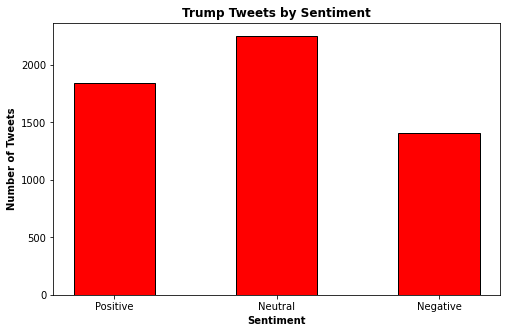

In [ ]:
print("Trump Tweet Sentiment Breakdown")
trump_positive = len(trump_df.loc[trump_df.Sentiment=='positive'])
trump_neutral = len(trump_df.loc[trump_df.Sentiment=='neutral'])
trump_negative = len(trump_df.loc[trump_df.Sentiment=='negative'])
data_t = {'Positive':trump_positive,'Neutral':trump_neutral,'Negative':trump_negative}
sentiment_t = list(data_t.keys())
num_tweets_t = list(data_t.values())
plt.figure(figsize = (8, 5))
plt.bar(sentiment_t, num_tweets_t, color ='red', width = 0.5, edgecolor='black',)
plt.xlabel("Sentiment", fontweight ='bold')
plt.ylabel("Number of Tweets", fontweight ='bold')
plt.title("Trump Tweets by Sentiment", fontweight ='bold')
plt.show()

Biden Tweet Sentiment Breakdown


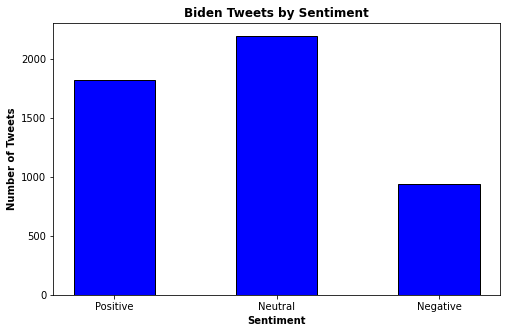

In [ ]:
print("Biden Tweet Sentiment Breakdown")
biden_positive = len(biden_df.loc[biden_df.Sentiment=='positive'])
biden_neutral = len(biden_df.loc[biden_df.Sentiment=='neutral'])
biden_negative = len(biden_df.loc[biden_df.Sentiment=='negative'])
data_b = {'Positive':biden_positive,'Neutral':biden_neutral,'Negative':biden_negative}
sentiment_b = list(data_b.keys())
num_tweets_b = list(data_b.values())
plt.figure(figsize = (8, 5))
plt.bar(sentiment_b, num_tweets_b, color ='blue', width = 0.5, edgecolor='black')
plt.xlabel("Sentiment", fontweight ='bold')
plt.ylabel("Number of Tweets", fontweight ='bold')
plt.title("Biden Tweets by Sentiment", fontweight ='bold')
plt.show()

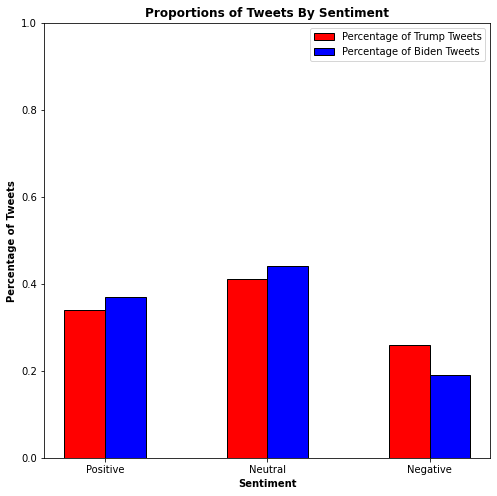

In [ ]:
total_tweets_t = len(trump_df.Sentiment)
prop_tweets_t = list(map(lambda x: round(x/total_tweets_t,2), num_tweets_t))
total_tweets_b = len(biden_df.Sentiment)
prop_tweets_b = list(map(lambda x: round(x/total_tweets_b,2), num_tweets_b))
bar_width = 0.25
plt.subplots(figsize=(8,8))
br1 = np.arange(3)
br2 = [x + bar_width for x in br1]
t = plt.bar(br1, prop_tweets_t, color ='r', width = bar_width,
            edgecolor ='black', label ='Trump')
b = plt.bar(br2, prop_tweets_b, color ='b', width = bar_width,
            edgecolor ='black', label ='Biden')
plt.xlabel('Sentiment',fontweight ='bold')
plt.ylabel('Percentage of Tweets',fontweight ='bold')
plt.xticks([r + bar_width/2 for r in range(3)],['Positive','Neutral','Negative'])
plt.legend([t,b],['Percentage of Trump Tweets','Percentage of Biden Tweets'])
plt.ylim(0.0, 1.0)
plt.title('Proportions of Tweets By Sentiment',fontweight ='bold')
plt.show()

In [ ]:
def get_all_tweets(df,by_sentiment=False,sentiment="positive"):
    words = ' '.join(df['tweetNew'].apply(lambda x: ' '.join(x)))
    return words

In [ ]:
words_trump = get_all_tweets(trump_df)
words_biden = get_all_tweets(biden_df)
tokens_trump = word_tokenize(words_trump)
tokens_biden = word_tokenize(words_biden)
def create_wordcloud(words):
    wordcloud = WordCloud(max_font_size=200, max_words=200,
                          background_color="white").generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

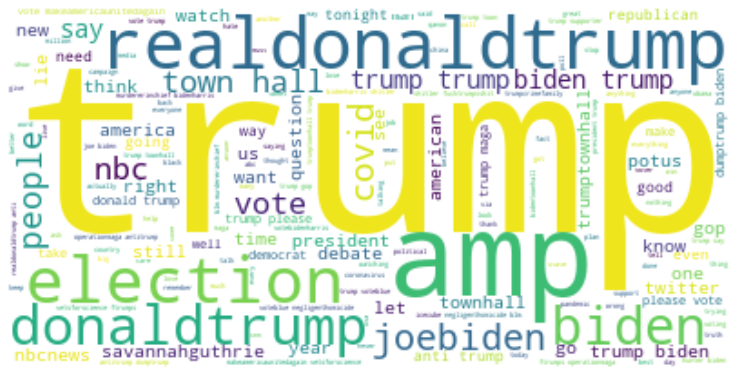

In [ ]:
create_wordcloud(words_trump)

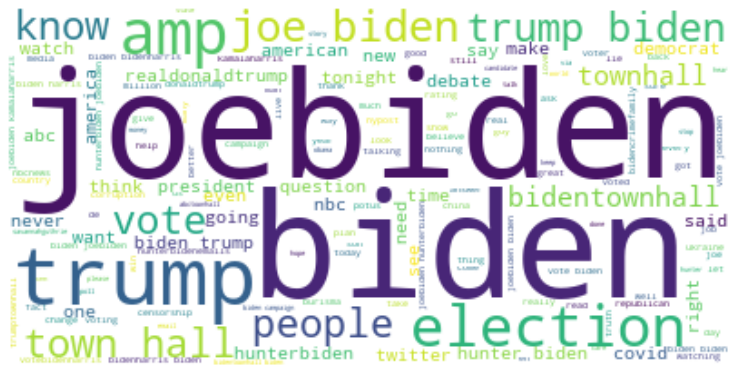

In [ ]:
create_wordcloud(words_biden)

In [ ]:
trump_state_polarity = trump_df.groupby("State",as_index=False).mean()
fig = px.bar(trump_state_polarity, x="State", y="Polarity",
            title="<b>Average Polarity of Trump-Related Tweets by State</b>")
fig.update_traces(marker=dict(color="red"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show()

In [ ]:
biden_state_polarity = biden_df.groupby("State",as_index=False).mean()

fig = px.bar(biden_state_polarity, x="State", y="Polarity",
            title="<b>Average Polarity of Biden-Related Tweets by State</b>")
fig.update_traces(marker=dict(color="blue"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show()
